In [ ]:
# extract tokens

In [ ]:
# pip install PyMuPDF
# python -m pip install 'spacy~=3.2.6'  
# python -m spacy download en_core_web_sm

In [3]:
import pymupdf

In [4]:
# extract text from pdf

def extract_text_from_pdf(pdf_path):
    # Open the PDF file
    document = pymupdf.open(pdf_path)
    text = ""
   
    # Iterate through each page and extract text
    for page_num in range(document.page_count):
        page = document.load_page(page_num)
        text += page.get_text()
   
    return text
 
# Example PDF file path
pdf_path = "/Users/yuhe/Desktop/AIPH/weekly/2024/Jul/TCGA-TS-A8AY_PUBL_meso_nationwidechildrens.org_pathology-reports_Level-1.418.3__1_V1.pdf"
 
# Extract text from the PDF
pdf_text = extract_text_from_pdf(pdf_path)
print(pdf_text)

UUID : 86750CA3 - 218B - 4F37 - BAB7 -CCED5112C826
TCGA-TS-A8AY-91A-PR
Redacted
IIIIIIIIII11111111III
111111111111IIIIII111111111111111111IIIIN
1111111 IIIIIIIIIIIIII IIIIUIIIIIIIIIIU1111111IIIIIIIIIIIIIII
III IIII II111111IIIIII111111111 II I IIIIII IIIIIII I IIIIIIIIIIII II II1
Print Date:
Date Collected:
Date Received .
7ye.Sex: Female
Accession NIMMIMM
Physician:
Copy to:
S u r g i c a l P a t h o I a g y R a y o r t
Accession Number
Collection Date/Time
Received Date/Time
Verified Date/Time
Pathologist
Clinical Information
year old female with mesothelioma; Left Thoracotorny, Bronchoscopy, PDT, Total Pleurectomy
Final Diagnosis
t. PREVIOUS INCISION:
Skin and underlying soft tissue with changes consistent with previous site, no tumor seen.
Calretinin stain confirms absence of mesothelioma
2. RIB:
Bone with trilinear bone marrow formation and tenosynovial type soft tissue and fibromuscular soft tissue, no tumor seen.
3. PERIAORTIC TISSUE:
Fibrofatty soft tissue, no tumor seen.
4. LE

In [6]:
import spacy
import medspacy
 
# Load SpaCy model for NLP as nlp_name

def single_file_freq(text, nlp_name):
    if nlp_name=="spacy":
        nlp=nlp = spacy.load("en_core_web_sm")
    elif nlp_name=="medspacy":
        nlp= medspacy.load()
        
    token={}
    # Process the text with SpaCy
    doc = nlp(text)

    
    # Extract phrases (entities)
    for e in doc.ents:
        if len(e)==1:
            continue
        e=str(e).lower()
        if e not in token:
            token[e]=1
        else:
            token[e]+=1

    # extract single tokens
    for e in doc:
        if e.pos_=="PUNCT" or len(e)==1 or e.is_stop:
            continue
        e=str(e).lower()
        try:
            e=float(e)
            continue
        except ValueError:
            if e not in token:
                token[e]=1
            else:
                token[e]+=1

    
    return token
 
# Perform NLP on the extracted PDF text
token_for_one = single_file_freq(pdf_text,"medspacy")
token_for_one

{'uuid': 1,
 '86750ca3': 1,
 '218b': 1,
 '4f37': 1,
 'bab7': 1,
 '-cced5112c826': 1,
 'tcga': 1,
 'ts': 1,
 'a8ay': 1,
 '91a': 1,
 'pr': 1,
 'redacted': 1,
 'iiiiiiiiii11111111iii': 1,
 '111111111111iiiiii111111111111111111iiiin': 1,
 'iiiiiiiiiiiiii': 1,
 'iiiiuiiiiiiiiiiu1111111iiiiiiiiiiiiiii': 1,
 'iii': 1,
 'iiii': 1,
 'ii111111iiiiii111111111': 1,
 'ii': 2,
 'iiiiii': 1,
 'iiiiiii': 1,
 'iiiiiiiiiiii': 1,
 'ii1': 1,
 'print': 4,
 'date': 21,
 'collected': 4,
 'received': 18,
 '7ye': 1,
 'sex': 4,
 'female': 5,
 'accession': 6,
 'nimmimm': 1,
 'physician': 4,
 'copy': 4,
 'number': 5,
 'collection': 4,
 'time': 8,
 'verified': 5,
 'pathologist': 5,
 'clinical': 1,
 'information': 1,
 'year': 1,
 'old': 1,
 'mesothelioma': 7,
 'left': 1,
 'thoracotorny': 1,
 'bronchoscopy': 1,
 'pdt': 1,
 'total': 1,
 'pleurectomy': 1,
 'final': 1,
 'diagnosis': 2,
 't.': 1,
 'previous': 3,
 'incision': 2,
 'skin': 4,
 'underlying': 1,
 'soft': 13,
 'tissue': 21,
 'changes': 1,
 'consistent': 1,
 '

In [7]:
def entire_files_freq(freq_sep_f):
    freq_entire={}
    for f in freq_sep_f:
        for i in freq_sep_f[f].keys():
            if i not in freq_entire:
                freq_entire[i]=1
            else:
                freq_entire[i]+=1
    return freq_entire

In [17]:
import pandas as pd
import os
file_path="/Users/yuhe/Desktop/AIPH/weekly/2024/Jul/output"
files=os.listdir("/Users/yuhe/Desktop/AIPH/weekly/2024/Jul/output")

def getreport(file_path, files, nlp_name):
    frequency_separate_files={}
    for f in files:
        single_file=f'{file_path}/{f}/{f}.pdf'
        frequency_separate_files[f]=single_file_freq(extract_text_from_pdf(single_file), nlp_name)
    
    frequency_entire_files=entire_files_freq(frequency_separate_files)
    frequency_entire_files=dict(sorted(frequency_entire_files.items(), key=lambda item: item[1], reverse=True))

    freq_df=pd.DataFrame(frequency_entire_files.items(), columns=['Token','Frequency'])
    # freq_df.to_excel(f"TokenFreq_{nlp_name}.xlsx",index=False)

    return freq_df, nlp_name

sh1, sh1_n=getreport(file_path, files, "spacy")
sh2, sh2_n=getreport(file_path, files, "medspacy")

with pd.ExcelWriter("TokenFreq.xlsx") as writer:
    sh1.to_excel(writer, index=False,sheet_name=sh1_n)
    sh2.to_excel(writer, index=False,sheet_name=sh2_n)

In [ ]:
# medspacy (clinical) scispacy

In [23]:
import numpy as np
tokendf=pd.read_excel("/Users/yuhe/Desktop/AIPH/weekly/2024/Jul/TokenFreq_clean.xlsx",sheet_name='spacy')
tokendf["freq_ctg"]=np.where(tokendf.Frequency>=80, ">80",
                         np.where(tokendf.Frequency>=70,"70-80",
                                 np.where(tokendf.Frequency>=60,"60-70",
                                         np.where(tokendf.Frequency>=50,"50-60",
                                                 np.where(tokendf.Frequency>=40,"40-50",
                                                         np.where(tokendf.Frequency>=30,"30-40",
                                                                 np.where(tokendf.Frequency>=20,"20-30",
                                                                         np.where(tokendf.Frequency>=10,"10-20","<10"))))))))
tokendf['freq_ctg'].value_counts()

freq_ctg
<10      8061
10-20     230
20-30     110
30-40      41
40-50      26
50-60      19
60-70      12
70-80       7
>80         4
Name: count, dtype: int64

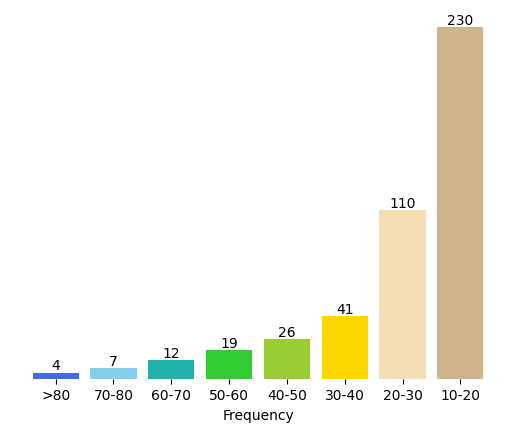

In [65]:
import matplotlib.pyplot as plt

val_set=tokendf['freq_ctg'].value_counts().to_dict()
val_set=dict(sorted(val_set.items(), key=lambda item:item[1] ))

label=list(val_set.keys())[:-1]
val=list(val_set.values())[:-1]

color=['royalblue', 'skyblue', 'lightseagreen', 'limegreen', 'yellowgreen','gold','wheat','tan']

containers=plt.bar(label,val,color=color)
plt.bar_label(containers)
plt.xlabel("Frequency")
# plt.ylabel("Number")
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])
plt.savefig('frequency.png', transparent=True)

In [42]:
print()
print(val.reverse())


None
